# Explonatory Data Analysis

Import some basic packages

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
sns.set_style("whitegrid")

In [13]:
coffee = pd.read_csv('../data/coffee_after_cleaning.csv')
coffee = coffee.copy()

In [14]:
display(coffee)
print('The shape of coffee is ', coffee.shape)

,rating,region_africa_arabia,region_caribbean,region_central_america,region_hawaii,region_asia_pacific,region_south_america,type_espresso,type_organic,type_fair_trade,...,type_pod_capsule,type_blend,type_estate,roast,aroma,body,flavor,month,year,region
0,93.0,1,0,0,0,0,0,0,0,0,...,0,0,0,Medium-Light,9.0,9.0,9.0,January,2019,region_africa_arabia
1,91.0,0,0,0,0,1,0,1,0,0,...,0,0,1,Medium,8.0,8.0,8.0,January,2019,region_asia_pacific
2,95.0,1,0,0,0,0,0,0,0,0,...,0,0,0,Medium,9.0,9.0,10.0,January,2019,region_africa_arabia
3,93.0,1,0,0,0,0,0,0,0,0,...,0,0,0,Medium-Light,9.0,9.0,9.0,January,2019,region_africa_arabia
4,93.0,0,0,0,0,0,0,1,0,0,...,0,0,0,Medium-Light,9.0,8.0,9.0,January,2019,region_africa_arabia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4675,83.0,0,0,0,0,0,0,0,0,0,...,0,0,0,Medium-Light,8.0,7.0,7.0,February,1997,region_africa_arabia
4676,81.0,0,0,0,0,0,0,0,0,0,...,0,0,0,Dark,7.0,6.0,8.0,February,1997,region_africa_arabia
4677,75.0,0,0,0,0,0,0,0,0,0,...,0,0,0,Medium,6.0,6.0,5.0,February,1997,region_africa_arabia
4678,74.0,0,0,0,0,0,0,0,0,0,...,0,0,0,Light,7.0,6.0,6.0,February,1997,region_africa_arabia


The shape of coffee is  (4680, 21)


## Predicted Value

The distribution of `rating` is slightly skew.

-1.799304535535022


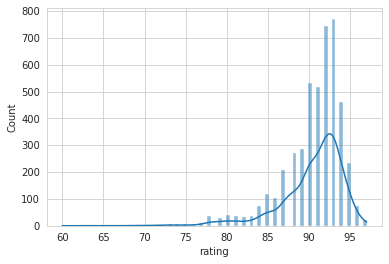

In [15]:
sns.histplot(data = coffee, x = "rating", kde = True)
print(coffee.rating.skew())

## Numerical Features

It seems that all the numerical features has positive correlation with the predicted value `rating`.

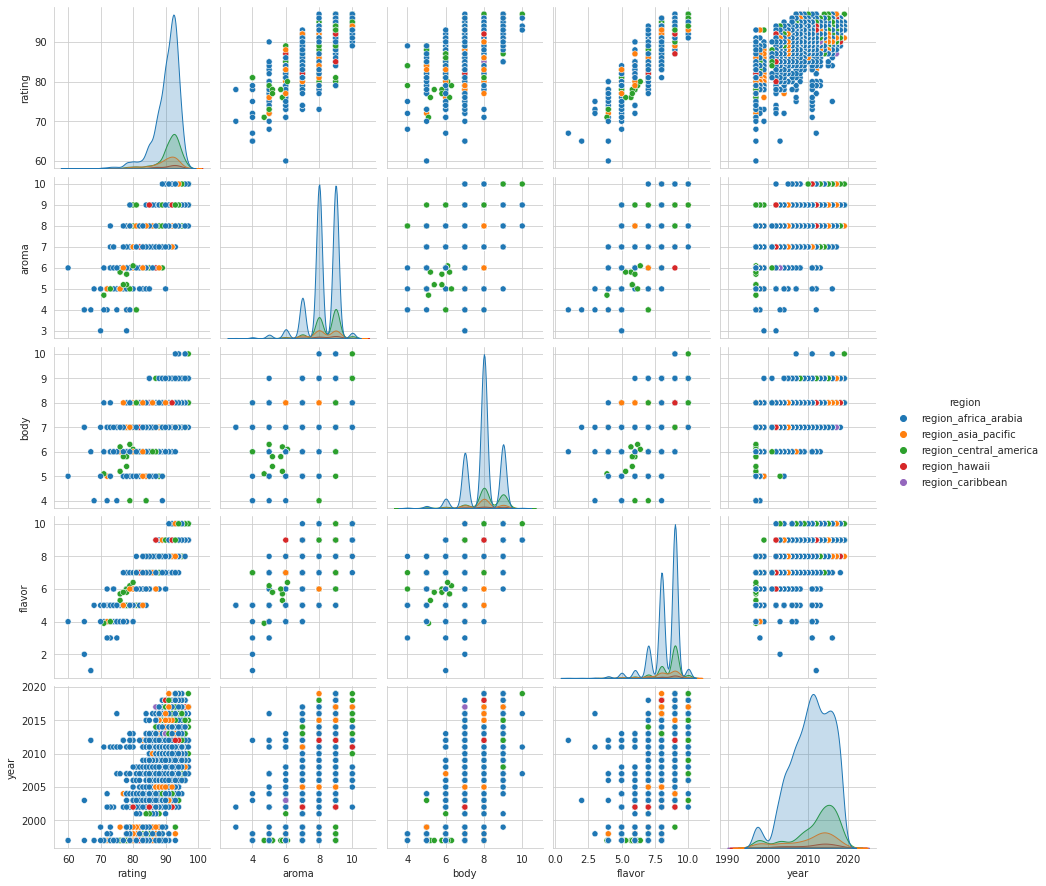

In [16]:
##make an initial pairplot to look at relationships between ratings and how they relate to the country of origin
sns.pairplot(coffee, vars = ["rating", "aroma", "body", "flavor", "year"],  hue = "region")

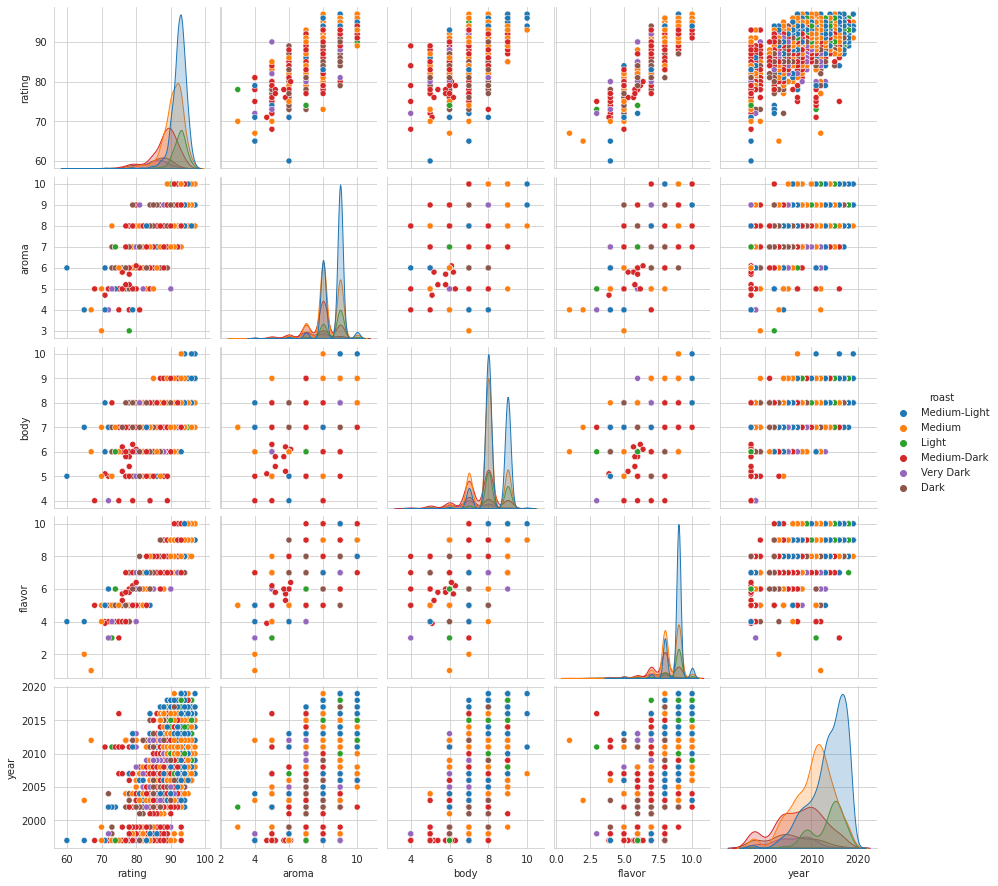

In [17]:
##make an initial pairplot to look at relationships between ratings and how they relate to the country of origin
sns.pairplot(coffee, vars = ["rating", "aroma", "body", "flavor", "year"],  hue = "roast")

### Correlation

We could also compare the correlation across numerical features.

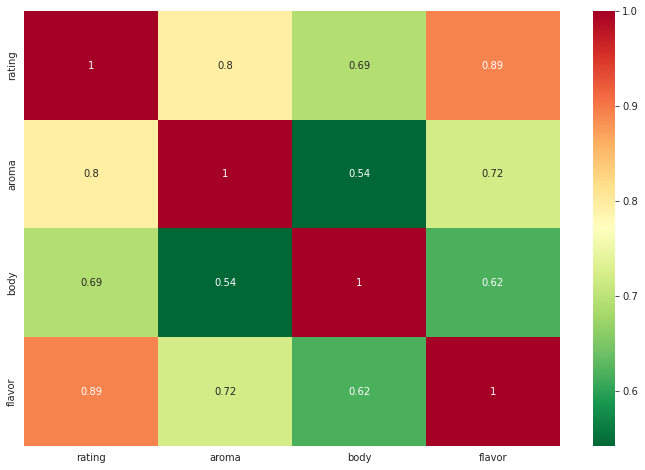

In [7]:
corrmat = coffee[["rating", "aroma", "body", "flavor"]].corr()
plt.figure(figsize=(12,8))
g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn_r")

## Categorical

In this section, we deal with categorical data. To begin with, we create a function `srt_box` to systematically generate the boxplots for all the categorical predictors with `rating`. 

In [8]:
# This function presents all the boxplots of categorical preditors with SalePrice
def srt_box(y, df):
    fig, axes = plt.subplots(3, 3, figsize=(16, 14))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['category']).columns, axes):

        sortd = df.groupby([i])[y].median().sort_values(ascending=True)
        sns.boxplot(x=i,
                    y=y,
                    data=df,
                    palette='plasma',
                    order=sortd.index,
                    ax=j)
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=18))

        plt.tight_layout()

In [9]:
coffee.columns

Index(['rating', 'region_africa_arabia', 'region_caribbean',
       'region_central_america', 'region_hawaii', 'region_asia_pacific',
       'region_south_america', 'type_espresso', 'type_organic',
       'type_fair_trade', 'type_decaffeinated', 'type_pod_capsule',
       'type_blend', 'type_estate', 'roast', 'review_date', 'aroma', 'body',
       'flavor', 'region'],
      dtype='object')

In [10]:
categorical = ['type_espresso', 'type_organic',
       'type_fair_trade', 'type_decaffeinated', 'type_pod_capsule',
       'type_blend', 'type_estate', 'roast', 'region']
df_categorical = coffee[categorical].astype('category',copy=False)
df_categorical['rating'] = coffee['rating']
df_categorical.shape

(4680, 10)

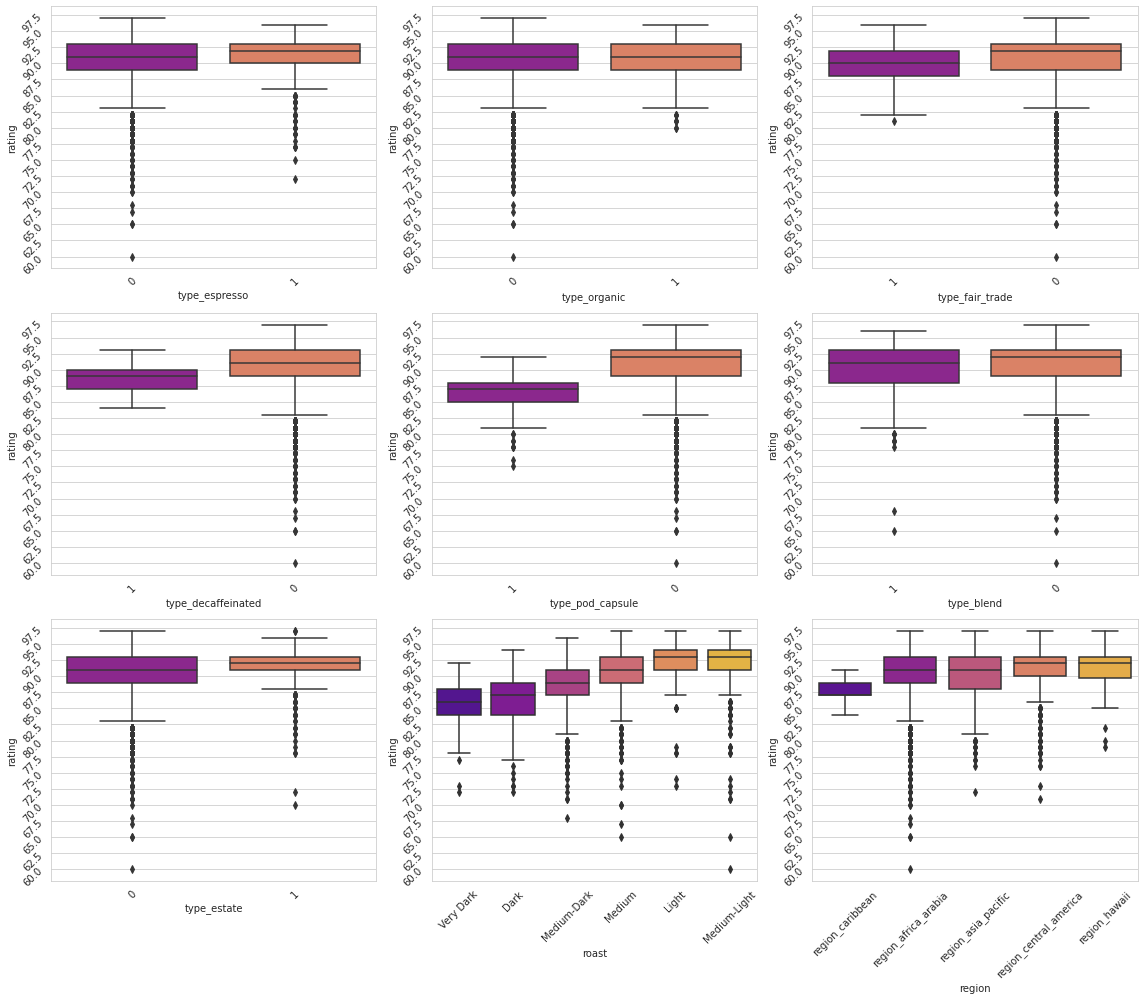

In [11]:
srt_box('rating', df_categorical)